<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%203/Modulo_3_Ejercicio_3_kNN_Clasificacion_Piezas_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 3: Implementación de k-NN en Clasificación de Piezas Metálicas**
#### Aplicación del algoritmo k-Nearest Neighbors (k-NN) para clasificar piezas metálicas

### **Introducción**
En este ejercicio, aplicaremos el algoritmo k-Nearest Neighbors (k-NN) para clasificar piezas metálicas en función de sus características. El objetivo es entrenar un modelo de clasificación para predecir si una pieza es "OK" o "KO" y evaluar su rendimiento con diferentes valores de k.

In [1]:
# Celda 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configuración de gráficos
sns.set(style='whitegrid')

### **Descripción del dataset**
Se utilizará el dataset "Control de calidad en línea de producción de piezas metálicas", que contiene información sobre diversas características físicas de las piezas y su clasificación en "OK" o "KO" (defectuosa).

In [2]:
# Celda 2
dataset_path = "https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/control_calidad_piezas_metalicas.csv"
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas del dataset
data.head()


,ID_pieza,Temperatura,Presión_molde,Tiempo_inyección,Viscosidad_material,Humedad_ambiente,Energía_consumida,Operario_turno,Día_semana,Lote_producción,Desgaste_molde,Tiempo_desmoldeo,Ancho_pieza,Altura_pieza,Defecto
0,1,209.934283,1529.461844,6.030595,2.450860,39.217029,5.779265,Operario_3,Lunes,Lote_13,0.458149,3.688541,50.157288,101.279351,OK
1,2,197.234714,1480.767531,3.844645,3.121770,43.969118,9.031166,Operario_5,Viernes,Lote_6,0.505443,3.834900,59.949957,96.724974,KO
2,3,212.953771,1785.537227,5.575437,2.862635,43.672496,6.462271,Operario_4,Miércoles,Lote_14,0.597260,3.286921,43.763784,118.998853,KO
3,4,230.460597,1959.849342,4.380762,2.217833,33.957695,12.616841,Operario_5,Domingo,Lote_13,0.332967,3.305580,52.769876,115.421844,KO
4,5,195.316933,1706.054083,4.672597,1.591750,72.752929,10.004330,Operario_5,Lunes,Lote_17,0.565406,2.961457,46.792873,97.644322,OK


In [3]:
# Celda 3
# Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_pieza             50000 non-null  int64  
 1   Temperatura          50000 non-null  float64
 2   Presión_molde        50000 non-null  float64
 3   Tiempo_inyección     50000 non-null  float64
 4   Viscosidad_material  50000 non-null  float64
 5   Humedad_ambiente     50000 non-null  float64
 6   Energía_consumida    50000 non-null  float64
 7   Operario_turno       50000 non-null  object 
 8   Día_semana           50000 non-null  object 
 9   Lote_producción      50000 non-null  object 
 10  Desgaste_molde       50000 non-null  float64
 11  Tiempo_desmoldeo     50000 non-null  float64
 12  Ancho_pieza          50000 non-null  float64
 13  Altura_pieza         50000 non-null  float64
 14  Defecto              50000 non-null  object 
dtypes: float64(10), int64(1), object(4)


In [4]:
# Celda 4
# Resumen estadístico
data.describe()

,ID_pieza,Temperatura,Presión_molde,Tiempo_inyección,Viscosidad_material,Humedad_ambiente,Energía_consumida,Desgaste_molde,Tiempo_desmoldeo,Ancho_pieza,Altura_pieza
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,199.991582,1500.706390,5.003570,2.500439,50.064344,9.996071,0.499951,2.997470,49.978314,99.977572
std,14433.901067,20.003397,300.494876,0.999576,0.579031,17.314982,2.000558,0.100241,0.499881,5.016990,10.016849
min,1.000000,110.687923,161.109442,1.000668,1.500005,20.000876,1.191572,0.068703,0.585282,30.981787,57.727682
25%,12500.750000,186.427496,1299.035855,4.328381,1.994696,35.108689,8.649105,0.431807,2.658397,46.582697,93.257200
50%,25000.500000,200.034788,1501.115918,5.003123,2.497682,50.151254,9.986736,0.500198,2.996466,49.975572,100.003527
75%,37500.250000,213.541207,1703.058467,5.678093,3.001106,65.073083,11.346159,0.567456,3.335519,53.371586,106.758270
max,50000.000000,289.581685,2648.934651,9.562115,3.499959,79.994648,18.438733,0.930185,5.002942,70.505102,141.532574


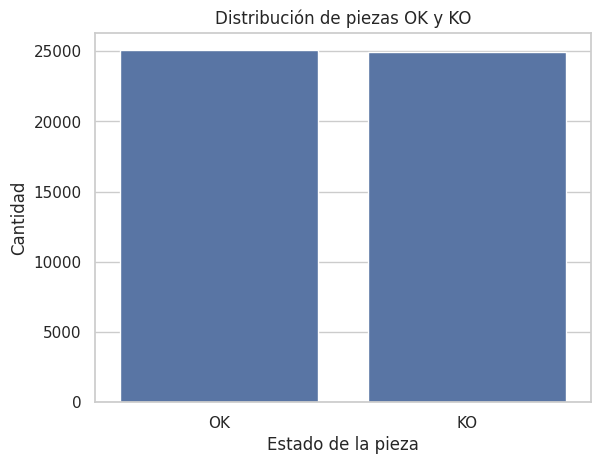

In [5]:
# Celda 5
# Distribución de la variable objetivo "Defecto"
sns.countplot(x="Defecto", data=data)
plt.title("Distribución de piezas OK y KO")
plt.xlabel("Estado de la pieza")
plt.ylabel("Cantidad")
plt.show()


### **Preparación de los datos**
Se seleccionan las características numéricas y la variable objetivo, y se normalizan los datos antes de dividirlos en entrenamiento y prueba.

In [6]:
# Convertir variables categóricas a dummies
data = pd.get_dummies(data, columns=['Operario_turno', 'Día_semana', 'Lote_producción'], drop_first=True)

# Convertir la variable objetivo a valores numéricos (OK -> 0, KO -> 1)
data['Defecto'] = data['Defecto'].map({"OK": 0, "KO": 1})

# Verificar la estructura del dataset después de las transformaciones
data.head()


,ID_pieza,Temperatura,Presión_molde,Tiempo_inyección,Viscosidad_material,Humedad_ambiente,Energía_consumida,Desgaste_molde,Tiempo_desmoldeo,Ancho_pieza,...,Lote_producción_Lote_19,Lote_producción_Lote_2,Lote_producción_Lote_20,Lote_producción_Lote_3,Lote_producción_Lote_4,Lote_producción_Lote_5,Lote_producción_Lote_6,Lote_producción_Lote_7,Lote_producción_Lote_8,Lote_producción_Lote_9
0,1,209.934283,1529.461844,6.030595,2.450860,39.217029,5.779265,0.458149,3.688541,50.157288,...,False,False,False,False,False,False,False,False,False,False
1,2,197.234714,1480.767531,3.844645,3.121770,43.969118,9.031166,0.505443,3.834900,59.949957,...,False,False,False,False,False,False,True,False,False,False
2,3,212.953771,1785.537227,5.575437,2.862635,43.672496,6.462271,0.597260,3.286921,43.763784,...,False,False,False,False,False,False,False,False,False,False
3,4,230.460597,1959.849342,4.380762,2.217833,33.957695,12.616841,0.332967,3.305580,52.769876,...,False,False,False,False,False,False,False,False,False,False
4,5,195.316933,1706.054083,4.672597,1.591750,72.752929,10.004330,0.565406,2.961457,46.792873,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Celda 6
# Definir variables predictoras y objetivo
X = data.drop(columns=["Defecto"])
y = data["Defecto"]

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Entrenamiento del modelo k-NN**
Se entrena un modelo k-NN con un valor inicial de k=5.

In [8]:
# Celda 7
# Crear y entrenar el modelo k-NN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### **Evaluación del modelo**
Se evalúa el modelo utilizando métricas de clasificación como precisión y matriz de confusión.

In [9]:
# Celda 8
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.51
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.51      0.62      0.56      5015
           1       0.51      0.39      0.44      4985

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000



### **Visualización de la matriz de confusión**
Se muestra la matriz de confusión para analizar el desempeño del modelo en cada categoría.

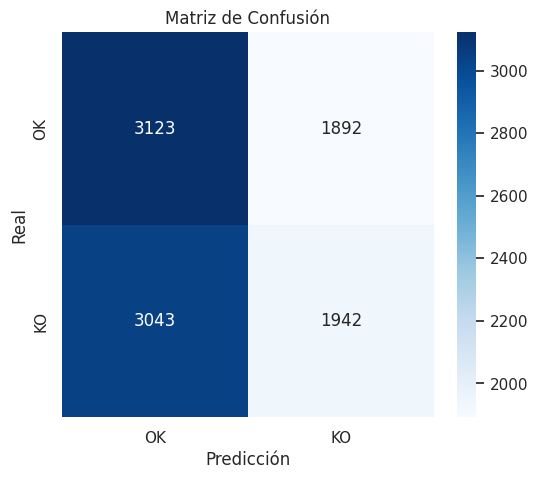

In [12]:
# Celda 9
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['OK', 'KO'], yticklabels=['OK', 'KO'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### **Comparación con diferentes valores de k**
Se analiza el impacto de distintos valores de k en la precisión del modelo.

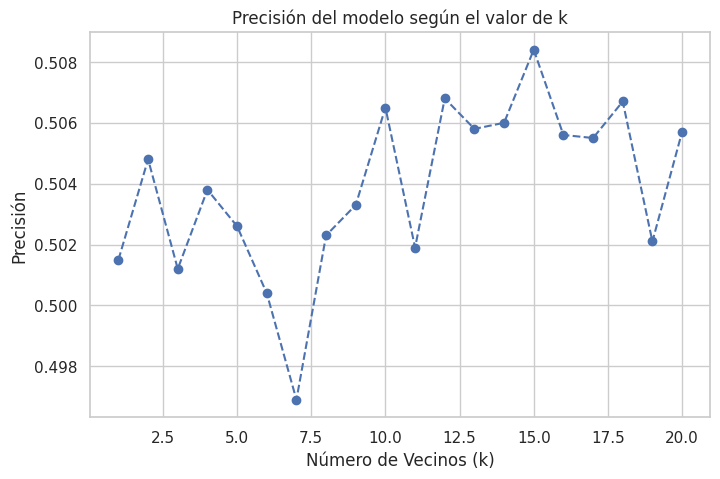

In [11]:
# Celda 10
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

# Visualización de los resultados
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.title('Precisión del modelo según el valor de k')
plt.show()

### **Conclusiones**
En este ejercicio, hemos aplicado el algoritmo k-NN para clasificar piezas metálicas como "OK" o "KO".

Se ha evaluado el impacto del número de vecinos (k) en la precisión del modelo, observando que valores pequeños de k pueden generar sobreajuste, mientras que valores grandes pueden suavizar demasiado las predicciones.

Se podrían explorar técnicas adicionales como la selección óptima de características, ajuste de hiperparámetros o uso de métodos de reducción de dimensionalidad para mejorar el desempeño del modelo.